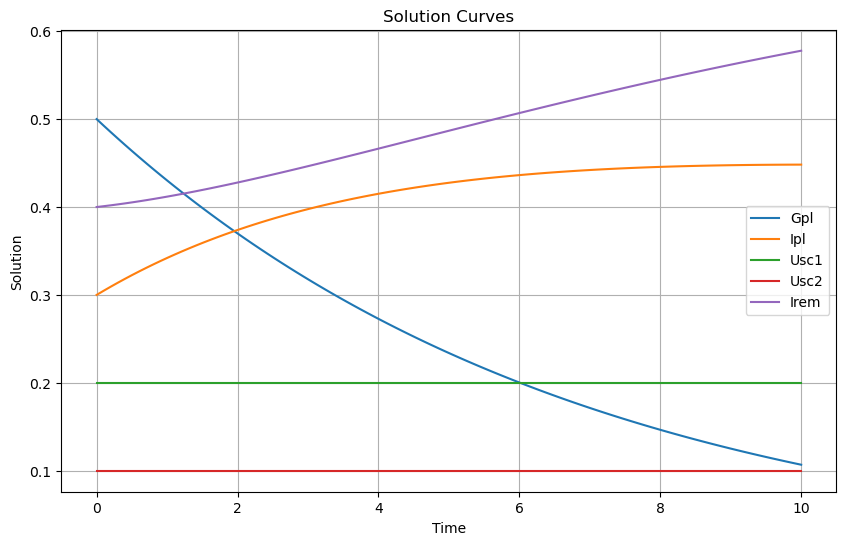

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of differential equations
def system(y, t):
    Gpl, Ipl, Usc1, Usc2, Irem = y
    
    # Parameters
    gliv = 0.1
    ggut = 0.2
    gnonit = 0.05
    git = 0.15
    gren = 0.08
    ipnc = 0.05
    isa = 0.1
    ila = 0.05
    iliv = 0.12
    irem = 0.07
    k10 = 0
    k9 = 0
    ipl = 0.15
    iit = 0.09
    Ula = 1
    
    dGpl_dt = gliv * (Gpl * Irem) + ggut * MGgut(t) - gnonit * Gpl - git * (Gpl * Irem) - gren * Gpl
    dIpl_dt = ipnc * Gpl + isa * (Usc1 + Usc2) + ila * Ula - iliv * Ipl - irem * Ipl
    dUsc1_dt = usa(t) - k10 * Usc1
    dUsc2_dt = k10 * Usc1 - k9 * Usc2
    dIrem_dt = ipl * Ipl - iit * Irem
    
    return [dGpl_dt, dIpl_dt, dUsc1_dt, dUsc2_dt, dIrem_dt]

# Define the initial conditions
initial_conditions = [0.5, 0.3, 0.2, 0.1, 0.4]  # Example initial conditions

# Define the time points for evaluation
t = np.linspace(0, 10, 100)  # Adjust the range and number of points as needed

# Define the placeholder functions MGgut(t) and usa(t)
def MGgut(t):
    # Define the function for MGgut(t) here
    return 0.0

def usa(t):
    # Define the function for usa(t) here
    return 0.0

# Solve the system of differential equations
solution = odeint(system, initial_conditions, t)

# Extract the individual variables' solutions
Gpl_solution = solution[:, 0]
Ipl_solution = solution[:, 1]
Usc1_solution = solution[:, 2]
Usc2_solution = solution[:, 3]
Irem_solution = solution[:, 4]

# Plotting the solution curves
plt.figure(figsize=(10, 6))
plt.plot(t, Gpl_solution, label='Gpl')
plt.plot(t, Ipl_solution, label='Ipl')
plt.plot(t, Usc1_solution, label='Usc1')
plt.plot(t, Usc2_solution, label='Usc2')
plt.plot(t, Irem_solution, label='Irem')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.title('Solution Curves')
plt.legend()
plt.grid(True)
plt.show()


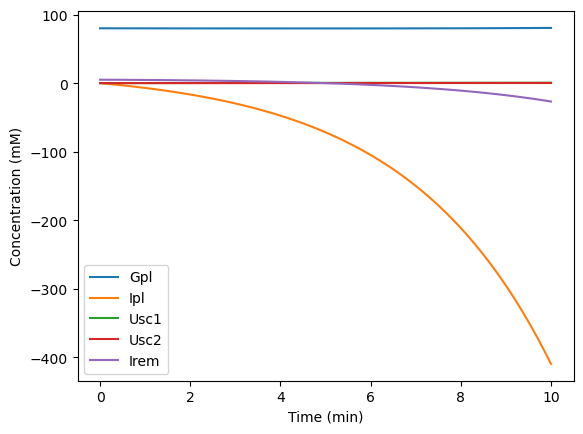

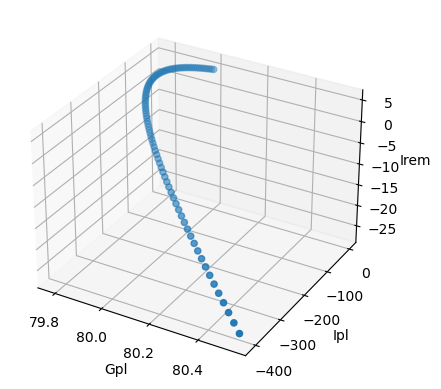

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# define the parameters and initial conditions
Dmeal = 0.8
MGgut = 0.0
usa = 0.1
ila = lambda Ula: 0.007*Ula
ipl = lambda Ipl: 0.03*Ipl
iit = lambda Irem: 0.06*Irem
gliv = lambda Gpl, Irem: 0.01*(80-Gpl) - 0.00015*Gpl*Irem
ggut = lambda MGgut: 0.1*(20-MGgut)
gnonit = lambda Gpl: 0.0001*Gpl
git = lambda Gpl, Irem: 0.00005*Gpl*Irem
gren = lambda Gpl: 0.1*(Gpl-60)
iliv = lambda Ipl: 0.3*(20-Ipl)
irem = lambda Ipl: 0.02*Ipl
Ula = 1
k10 = 0.1
t_start = 0
t_end = 10
t_points = np.linspace(t_start, t_end, 101)
y0 = [80, 0, 0.01, 0, 5]

# define the system of differential equations
def model(t, y, Dmeal, MGgut, usa, ila, ipl, iit, gliv, ggut, gnonit, git, gren, iliv, irem):
    Gpl, Ipl, Usc1, Usc2, Irem = y
    dGpl_dt = gliv(Gpl, Irem) + ggut(MGgut) - gnonit(Gpl) - git(Gpl, Irem) - gren(Gpl)
    dIpl_dt = ipl(Ipl) + isa(Usc1, Usc2) + ila(Ula) - iliv(Ipl) - irem(Ipl)
    dUsc1_dt = usa - k10*Usc1
    dUsc2_dt = k10*Usc1 - k9*Usc2
    dIrem_dt = ipl(Ipl) - iit(Irem)
    return [dGpl_dt, dIpl_dt, dUsc1_dt, dUsc2_dt, dIrem_dt]

# solve the differential equations
sol = solve_ivp(model, [t_start, t_end], y0, t_eval=t_points, args=(Dmeal, MGgut, usa, ila, ipl, iit, gliv, ggut, gnonit, git, gren, iliv, irem))

# Plot the results
plt.plot(sol.t, sol.y[0], label='Gpl')
plt.plot(sol.t, sol.y[1], label='Ipl')
plt.plot(sol.t, sol.y[2], label='Usc1')
plt.plot(sol.t, sol.y[3], label='Usc2')
plt.plot(sol.t, sol.y[4], label='Irem')
plt.legend(loc='best')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.show()

# extract the solution components
Gpl = sol.y[0]
Ipl = sol.y[1]
Irem = sol.y[4]

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Gpl, Ipl, Irem)
ax.set_xlabel('Gpl')
ax.set_ylabel('Ipl')
ax.set_zlabel('Irem')
plt.show()




In [ ]:
import numpy as np
from scipy.integrate import odeint

# Define the equations and parameters for the system of differential equations
def system(y, t):
    MGgut, Gpl, Ipl, Irem, Usc1, Usc2, Ula = y

    # Define the parameters
    # ...

    # Define the equations for each derivative
    dMGgut_dt = mGmeal(t) * Dmeal(t) - k2 * MGgut
    dGpl_dt = gliv(Gpl, Irem) + ggut(MGgut) - gnonit(Gpl) - git(Gpl, Irem) - gren(Gpl)
    dIpl_dt = ipnc(Gpl) + isa(Usc1, Usc2) + ila(t) - iliv(Gbpl, Ipl) - irem(Ipl)
    dIrem_dt = ipl(Ipl) - iit(Irem)
    dUsc1_dt = usa(t) - k10 * Usc1
    dUsc2_dt = k10 * Usc1 - k9 * Usc2
    dUla_dt = (h(t) * t_half(t) ** h(t) * t ** (h(t) - 1)) / ((t_half(t) ** h(t) + t ** h(t)) ** 2) * (1 / (vI * Mb)) * Ula

    return [dMGgut_dt, dGpl_dt, dIpl_dt, dIrem_dt, dUsc1_dt, dUsc2_dt, dUla_dt]

# Define the additional functions used in the equations
def Dmeal(t):
    # Define the meal function Dmeal(t) here
    # You can use any desired equation or implementation
    return ...

def mGmeal(t):
    # Define the function mGmeal(t) here
    # You can use any desired equation or implementation
    return ...

def gliv(Gpl, Irem):
    # Define the function gliv(Gpl, Irem) here
    # You can use any desired equation or implementation
    return ...

def ggut(MGgut):
    # Define the function ggut(MGgut) here
    # You can use any desired equation or implementation
    return ...

def gnonit(Gpl):
    # Define the function gnonit(Gpl) here
    # You can use any desired equation or implementation
    return ...

def git(Gpl, Irem):
    # Define the function git(Gpl, Irem) here
    # You can use any desired equation or implementation
    return ...

def gren(Gpl):
    # Define the function gren(Gpl) here
    # You can use any desired equation or implementation
    return ...

def ipnc(Gpl):
    # Define the function ipnc(Gpl) here
    # You can use any desired equation or implementation
    return ...

def isa(Usc1, Usc2):
    # Define the function isa(Usc1, Usc2) here
    # You can use any desired equation or implementation
    return ...

def ila(t):
    # Define the function ila(t) here
    # You can use any desired equation or implementation
    return ...

def iliv(Gbpl, Ipl):
    # Define the function iliv(Gbpl, Ipl) here
    # You can use any desired equation or implementation
    return ...

def irem(Ipl


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import math

# Define the system of differential equations
def model(t, y):
    Gpl, Ipl, Usc1, Usc2, Irem = y
    
# Parameters
k1 = 0.5
k2 = 0.8
k3 = 6.07e-3
k4 = 2.35e-4
k5 = 9.49e-2
k6 = 1.93e-1
k7 = 1.15
k8 = 7.27
k9 = 0
k10 = 0
k11 = 3.83e-2
k12 = 2.84e-1
KM = 13.2
a = 1
sigma = 1.34
c1 = 0.2
nuG = 0.7
Mb = 0.5
Gthpl = 0.3
tau_i = 0.9
vI = 0.6
h = 0.4
b = 0.3
Ibpl = 0.4
beta = 0.6

# mGmeal(t)
def mGmeal(t):
    return sigma * math.pow(k1, sigma) * math.pow(t, sigma - 1) * math.exp(-math.pow(k1 * t, sigma))

# mGpl(t)
def mGpl(MGgut_t):
    return k2 * MGgut_t

# Gnonit(t)
def gnonit(Gpl_t, Gbpl):
    return gbliv * ((KM + Gbpl) / Gbpl) * (Gpl_t / (KM + Gpl_t))

# Git(t)
def git(Gpl_t, Irem_t):
    return k5 * beta * Irem

# Gren(t)
def gren(Gpl_t):
    if Gpl_t > Gthpl:
        return (c1 / (nuG * Mb)) * (Gpl_t - Gthpl)
    else:
        return 0

# ggut(t)
def ggut(MGgut_t):
    return k2 * (f / (nuG * Mb)) * MGgut_t

# gliv(t)
def gliv(Gpl_t, Irem_t):
    return gbliv - k3 * (Gpl_t - Gbpl) - k4 * beta * Irem_t

# ipnc(t)
def ipnc(Gpl_t, Gbpl, dGpl_dt, t, t_int):
    integral = 0
    for t_val in range(t_int[0], t_int[1]):
        integral += (Gpl(t_val) - Gbpl) * dt
    return (beta ** (-1)) * (k6 * (Gpl_t - Gbpl) + (k7 / tau_i) * integral + (k7 / tau_i) * Gbpl + (k8 * tau_d) * dGpl_dt)

# isa(t)
def isa(Usc1_t, Usc2_t):
    return k9 * (1 / (vI * Mb)) * Usc2_t

# dUsc1/dt
def dUsc1_dt(usa_t, Usc1_t):
    return usa_t - k10 * Usc1_t

# dUsc2/dt
def dUsc2_dt(Usc1_t, Usc2_t):
    return k10 * Usc1_t - k9 * Usc2_t

# ila(t)
def ila(t, Ula_t):
    t_half = a * Ula_t + b
    return ((h * math.pow(t_half, h) * math.pow(t, h - 1)) / (math.pow(t_half, h) + math.pow(t, h)) ** 2) * (
                1 / (vI * Mb)) * Ula_t

# iliv(t)
def iliv(Gbpl, Ibpl, Ipl_t):
    return k7 * (Gbpl / (beta * tau_i * Ibpl)) * Ipl_t

# irem(t)
def irem(Ipl_t):
    return k11 * (Ipl_t - Ibpl)

# iit(t)
def iit(Irem_t):
    return k12 * Irem_t

# dIrem/dt
def dIrem_dt(ipl_t, Irem_t):
    return ipl_t * Irem_t - iit(Irem_t)

# dGpl/dt
def dGpl_dt(Gpl_t, MGgut_t, Irem_t):
    return gliv(Gpl_t, Irem_t) + ggut(MGgut_t) - gnonit(Gpl_t, Gbpl) - git(Gpl_t, Irem_t) - gren(Gpl_t)

# dIpl/dt
def dIpl_dt(Gpl_t, Ipl_t, Usc1_t, Usc2_t, Ula_t):
    return ipnc(Gpl_t, Gbpl, dGpl_dt(Gpl_t, MGgut_t, Irem_t), t, t_int) + isa(Usc1_t, Usc2_t) + ila(t, Ula_t) - iliv(Ipl_t) - irem(Ipl_t)

# Usc2I(t)
def Usc2I(Usc2_t):
    return Usc2_t

    # Equations
    dGpl_dt = gliv(Gpl, Irem) + ggut(MGgut) - gnonit(Gpl) - git(Gpl, Irem) - gren(Gpl)
    dIpl_dt = ipl(Ipl) + ila(Ula) - iliv(Ipl) - irem(Ipl)
    dUsc1_dt = usa - k10 * Usc1
    dUsc2_dt = k10 * Usc1 - k9 * Usc2
    dIrem_dt = ipl(Ipl) - iit(Irem)
    
    return [dGpl_dt, dIpl_dt, dUsc1_dt, dUsc2_dt, dIrem_dt]

# Set initial conditions
y0 = [80, 0, 0.01, 0, 5]

# Set the time interval for evaluation
t_start = 0
t_end = 10
t_points = np.linspace(t_start, t_end, 101)

# Solve the system of differential equations
sol = solve_ivp(model, [t_start, t_end], y0, t_eval=t_points)

# Extract the solution components
Gpl = sol.y[0]
Ipl = sol.y[1]
Irem = sol.y[4]

# Plot the results
plt.plot(sol.t, Gpl, label='Gpl')
plt.plot(sol.t, Ipl, label='Ipl')
plt.plot(sol.t, Irem, label='Irem')
plt.legend(loc='best')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.show()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Gpl, Ipl, Irem)
ax.set_xlabel('Gpl')
ax.set_ylabel('Ipl')
ax.set_zlabel('Irem')
plt.show()


In [29]:
from sympy import symbols, Function, dsolve

t = symbols('t')
Gpl = Function('Gpl')(t)
Irem = Function('Irem')(t)
MGgut = Function('MGgut')(t)

gliv = symbols('gliv')
ggut = symbols('ggut')
gnonit = symbols('gnonit')
git = symbols('git')
gren = symbols('gren')

dGpl_dt = gliv * (Gpl - Gbpl) - k4 * β * Irem * Gpl + ggut * MGgut - gnonit * Gpl - git * Gpl * Irem - gren * Gpl

# Solve the differential equation
solution = dsolve(dGpl_dt, Gpl)
# Print the solution
print("Gpl(t) solution:")
print(solution)


Gpl(t) solution:
Eq(Gpl(t), (-Gbpl*gliv + ggut*MGgut(t))/(git*Irem(t) - gliv + gnonit + gren + k4*β*Irem(t)))


In [31]:
from sympy import symbols, Function, Eq, integrate

t = symbols('t')
Ipl = Function('Ipl')(t)
Gpl = symbols('Gpl')
ipnc = symbols('ipnc')
isa = symbols('isa')
Usc1 = symbols('Usc1')
Usc2 = symbols('Usc2')
ila = symbols('ila')
Ula = symbols('Ula')
iliv = symbols('iliv')
irem = symbols('irem')

dIpl_dt = ipnc * Gpl + isa * Usc1 * Usc2 + ila * Ula - iliv * Ipl - irem * Ipl

solution = Eq(dIpl_dt.diff(t), dIpl_dt)
solution_text = str(solution)

print(solution_text)
display(solution)


Eq(-iliv*Derivative(Ipl(t), t) - irem*Derivative(Ipl(t), t), Gpl*ipnc + Ula*ila + Usc1*Usc2*isa - iliv*Ipl(t) - irem*Ipl(t))


Eq(-iliv*Derivative(Ipl(t), t) - irem*Derivative(Ipl(t), t), Gpl*ipnc + Ula*ila + Usc1*Usc2*isa - iliv*Ipl(t) - irem*Ipl(t))

In [ ]:
from sympy import symbols, Function, Eq, dsolve

t = symbols('t')
Usc1 = Function('Usc1')(t)
usa = Function('usa')(t)
k10 = symbols('k10')

dUsc1_dt = Eq(Usc1.diff(t), usa - k10 * Usc1)

solution = dsolve(dUsc1_dt, Usc1)

# Print the solution
print("Usc1(t) solution:")
print(solution)
display(solution)


In [36]:
from sympy import symbols, Function, Eq, dsolve

t = symbols('t')
Usc2 = Function('Usc2')(t)
Usc1 = Function('Usc1')(t)
k9, k10 = symbols('k9 k10')

dUsc2_dt = Eq(Usc2.diff(t), k10 * Usc1 - k9 * Usc2)

solution = dsolve(dUsc2_dt, Usc2)

# Print the solution
print("Usc2(t) solution:")
print(solution)
display(solution)

Usc2(t) solution:
Eq(Integral((-k10*Usc1(t) + k9*Usc2(t))*exp(k9*t), t), C1)


Eq(Integral((-k10*Usc1(t) + k9*Usc2(t))*exp(k9*t), t), C1)

In [ ]:
from sympy import symbols, Eq, Function, integrate, dsolve, lambdify

# Define the variables
t = symbols('t', real=True)
usa, k10 = symbols('usa k10', real=True)
MGgut = Function('MGgut')(t)
Gpl = Function('Gpl')(t)
Ipl = Function('Ipl')(t)
Usc1 = Function('Usc1')(t)
Usc2 = Function('Usc2')(t)
Irem_f = Function('Irem_f')(t)  # Use a different symbol for the function

# Define the parameters
sigma, k1, Dmeal, k2, gbliv, Gbpl, k4, beta, Irem, f, vG, Mb, KM, c1, Gthpl, k5, tau_i, tau_d, h, t_half, vI, Ula, k6, k7, t_int, k8, k9, k10, Ibpl, k11, k12 = symbols('sigma k1 Dmeal k2 gbliv Gbpl k4 beta Irem f vG Mb KM c1 Gthpl k5 tau_i tau_d h t_half vI Ula k6 k7 t_int k8 k9 k10 Ibpl k11 k12')

# Define the constant values
k1 = 1.45e-2
k2 = 2.76e-1
k3 = 6.07e-3
k4 = 2.35e-4
k5 = 9.49e-2
k6 = 1.93e-1
k7 = 1.15
k8 = 7.27
k9 = 0
k10 = 0
k11 = 3.83e-2
k12 = 2.84e-1
k13 = 0
sigma = 1.34
K_M = 13.2
gbliv = .043
Gthpl = 9
vG = 17/70
vI = 13/70
beta = 1
f = .005551
tau_i = 31
t_int = 30
tau_d = 3
c1 = .1

# Define the differential equations
dMGgut_dt = Eq(MGgut.diff(t), sigma * k1**(sigma) * t**(sigma-1) * (-(k1*t)**(sigma)) * Dmeal - k2 * MGgut)
dGpl_dt = Eq(Gpl.diff(t), (gbliv*(Gpl - Gbpl) - k4 * beta * Irem_f * Gpl + (f / (vG * Mb)) * k2 * MGgut - gbliv*((KM + Gbpl)/ Gbpl)*(Gpl / (KM + Gpl)) - k5 * beta * Irem_f * (Gpl / (KM + Gpl)) - (c1 / (vG * Mb)) * (Gpl - Gthpl)).simplify())
dIpl_dt = Eq(Ipl.diff(t), ((1 / beta) * (k6 * (Gpl - Gbpl) + (k7 / tau_i) * integrate((Gpl - Gbpl), (t, t, t_int)) + (k7 / tau_i) * Gbpl + k8 * tau_d * Gpl.diff(t))) + k9 * (1 / (vI * Mb)) * Usc2 + ((h * t_half**h * t**(h - 1)) / ((t_half**h + t**h)**2)) * ((1 / (vI * Mb)) * Ula) - k7 * (Gbpl / (beta * tau_i * Ibpl)) * Ipl)
dUsc1_dt = Eq(Usc1.diff(t), usa - k10 * Usc1)
dUsc2_dt = Eq(Usc2.diff(t), k10 * Usc1 - k9 * Usc2)
dIrem_dt = Eq(Irem_f.diff(t), k11 * (Ipl - Ibpl) - k12 * Irem_f)

# Solve the differential equations
solution_MGgut = dsolve(dMGgut_dt, MGgut)
solution_Gpl = dsolve(dGpl_dt, Gpl)
solution_Ipl = dsolve(dIpl_dt, Ipl)
solution_Usc1 = dsolve(dUsc1_dt, Usc1)
solution_Usc2 = dsolve(dUsc2_dt, Usc2)
solution_Irem = dsolve(dIrem_dt, Irem_f)

# Convert the solutions to Python functions
MGgut_func = lambdify(t, solution_MGgut.rhs)
Gpl_func = lambdify(t, solution_Gpl.rhs)
Ipl_func = lambdify(t, solution_Ipl.rhs)
Usc1_func = lambdify(t, solution_Usc1.rhs)
Usc2_func = lambdify(t, solution_Usc2.rhs)
Irem_func = lambdify(t, solution_Irem.rhs)

# Test the functions by evaluating them at a specific time
import numpy as np
import matplotlib.pyplot as plt

# Test the functions by evaluating them at a specific time
t_val = 1.5  # Specify the time value
MGgut_val = MGgut_func(t_val)
Gpl_val = Gpl_func(t_val)
Ipl_val = Ipl_func(t_val)
Usc1_val = Usc1_func(t_val)
Usc2_val = Usc2_func(t_val)
Irem_val = Irem_func(t_val)

# Print the results
print("MGgut(t) =", MGgut_val)
print("Gpl(t) =", Gpl_val)
print("Ipl(t) =", Ipl_val)
print("Usc1(t) =", Usc1_val)
print("Usc2(t) =", Usc2_val)
print("Irem(t) =", Irem_val)

# Specify the time range
t_start = 0
t_end = 10
num_points = 1000
t_values = np.linspace(t_start, t_end, num_points)

# Evaluate the functions at the specified time range
MGgut_values = MGgut_func(t_values)
Gpl_values = Gpl_func(t_values)
Ipl_values = Ipl_func(t_values)
Usc1_values = Usc1_func(t_values)
Usc2_values = Usc2_func(t_values)
Irem_values = Irem_func(t_values)

# Plot the graphs
plt.figure(figsize=(10, 6))
plt.plot(t_values, MGgut_values, label='MGgut(t)')
plt.plot(t_values, Gpl_values, label='Gpl(t)')
plt.plot(t_values, Ipl_values, label='Ipl(t)')
plt.plot(t_values, Usc1_values, label='Usc1(t)')
plt.plot(t_values, Usc2_values, label='Usc2(t)')
plt.plot(t_values, Irem_values, label='Irem(t)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Differential Equations')
plt.legend()
plt.grid(True)
plt.show()

